In [1]:
import numpy as np
import seaborn as sns

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

from scipy.spatial.transform import Rotation as R

In [2]:
def spherical(xyz):
    """
    Calculate spherical polar coordinates from cartesian coordinates
    
    Parameters
    ----------
    xyz: np.ndarray
        3d np array of shape (n,3) of cartesian coordinates
        first column are x coordinates
        second column are y coordinates
        third column are z coordinates
    
    Returns
    -------
    ptsnew: np.ndarray
        3d nparray of shape (n,3) of spherical polar coordinates
        ptsnew[i] is xyz[i] in spherical polar coordinates
        first column is radius
        second column is theta, angle from z axis
        third column is phi, angle from x axis when projected into x-y plane
    """
    ptsnew = np.zeros(xyz.shape)
    xy = xyz[:,0]**2 + xyz[:,1]**2
    ptsnew[:,0] = np.sqrt(xy + xyz[:,2]**2)
    ptsnew[:,1] = np.arctan2(np.sqrt(xy), xyz[:,2])
    ptsnew[:,2] = np.arctan2(xyz[:,1], xyz[:,0])
    return ptsnew

In [3]:
def create_unit_circle_xy_plane(n: int):
    """
    Create n 3D points on the unit circle in x-y plane
    
    Parameters
    ----------
    n: int
        number of points to select
    
    Returns
    -------
    np.ndarray, of shape (n,3)
        Array of coordinates representing n equally
        spaced points on the unit circle.
        Columns 0,1 and 2 are respectively x,y and z
        coordinates.
    """
    angles = np.linspace(0, np.pi*2, n, endpoint=False).reshape(-1,1)
    
    return np.hstack([np.cos(angles), np.sin(angles), np.zeros((n, 1))])

In [4]:
def plot_3d(xyz):
    """
    Plot array of xyz coordinates in 3d
    
    Parameters
    ----------
    xyz: np.ndarray
        3d np array of shape (n,3) of cartesian coordinates
        first column are x coordinates
        second column are y coordinates
        third column are z coordinates
    """
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(
        xyz[:,0],
        xyz[:,1],
        xyz[:,2],
    )

In [5]:
def plot_spherical_circle_after_rotation(x_angle, y_angle, z_angle):
    """
    Rotate unit circle, convert to spherical polar and plot.
    
    This function does the following:
        * take the unit circle in x-y plane centred on (0,0,0)
        * rotate about the x,y and z axis by x_angle,
          y_angle and z_angle respectively
        * convert to spherical polar coordinates
        * plot the theta and phi coordinates in a 2d plot
    
    Parameters
    ----------
    x_angle, y_angle, z_angle: float
        Angles, *in degrees*, representing how much to rotate
        about the x, y and z axes, respectively.
    """
    r = R.from_euler('xyz', [x_angle, y_angle, z_angle], degrees=True)
    new_circle = r.apply(unit_circle)
    spherical_circle = spherical(new_circle)
    sns.scatterplot(
        x=spherical_circle[:,1],
        y=spherical_circle[:,2],
        s=1,
        hue=0.5,
    )
    plt.legend([],[], frameon=False)

### manual testing of rotations, by plotting them in 3d

In [6]:
n=1000
unit_circle = create_unit_circle_xy_plane(n)

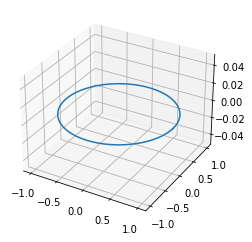

In [7]:
plot_3d(unit_circle)

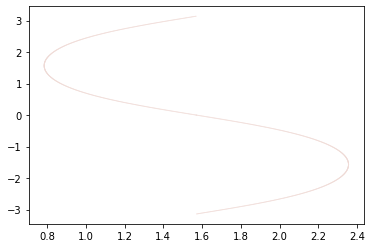

In [8]:
plot_spherical_circle_after_rotation(45,0,0)

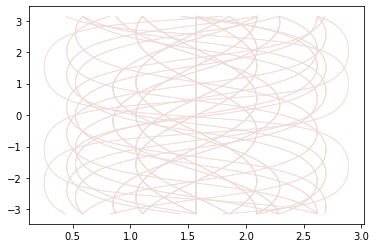

In [9]:
for x_angle in np.linspace(0, 300, 3):
    for y_angle in np.linspace(0, 300, 3):
        for z_angle in np.linspace(0, 300, 3):
            plot_spherical_circle_after_rotation(x_angle, y_angle, z_angle)

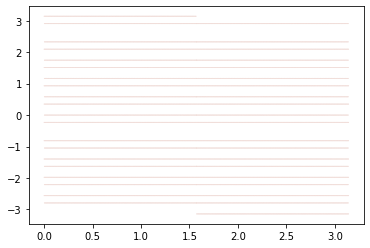

In [10]:
for z_angle in np.linspace(0, 300, 10):
    plot_spherical_circle_after_rotation(90, 0, z_angle)

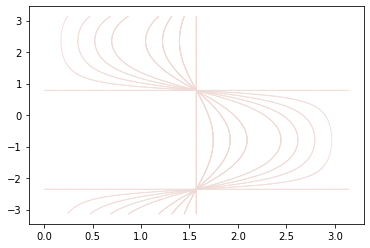

In [13]:
for x in [90, 80, 70, 60, 50, 30, 20, 10, 0]:
    plot_spherical_circle_after_rotation(x,0,45)

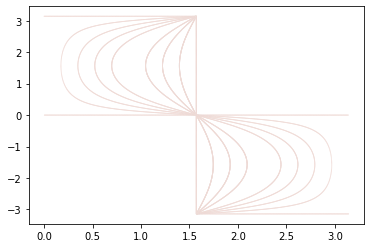

In [14]:
for x in [90, 80, 70, 60, 50, 30, 20, 10, 0]:
    plot_spherical_circle_after_rotation(x,0,0)